In [1]:
import numpy as np
import matplotlib.pyplot as plt
from layer import DenseLayer, ActivationLayer, FlattenLayer, SoftmaxLayer
from activation import relu
from loss import cross_entropy
from utils import load_mnist, train_one_epoch, evaluate

In [2]:
x_train, y_train, x_test, y_test = load_mnist()

x_train = x_train[:1000]
y_train = y_train[:1000]
x_test = x_test[:1000]
y_test = y_test[:1000]


In [3]:
network = [
    DenseLayer(28*28, 100),
    ActivationLayer(relu),
    DenseLayer(100, 100),
    ActivationLayer(relu),
    DenseLayer(100, 10),
    SoftmaxLayer(10)
]

loss_ep = []
tr_acc_ep = []
te_acc_ep = []
epochs = 20
lr = 0.001
bs = 32
print(f'Sanity Check: test_acc={evaluate(network, x_test, y_test)}')
for epoch in range(epochs):
    network, loss = train_one_epoch(network, x_train, y_train, cross_entropy, lr, batch_size=bs)
    tr_acc = evaluate(network, x_train, y_train, batch_size=bs)
    te_acc = evaluate(network, x_test, y_test, batch_size=bs)
    loss_ep.append(loss)
    tr_acc_ep.append(tr_acc)
    te_acc_ep.append(te_acc)
    print(f'[{epoch + 1}/{epochs}] loss={loss:.6f}, train_acc={tr_acc:.6f}, test_acc={te_acc:.6f}')


Sanity Check: test_acc=0.099
[1/20] loss=0.007239, train_acc=0.319000, test_acc=0.234000
[2/20] loss=0.006763, train_acc=0.598000, test_acc=0.520000
[3/20] loss=0.005960, train_acc=0.684000, test_acc=0.612000
[4/20] loss=0.004804, train_acc=0.743000, test_acc=0.660000
[5/20] loss=0.003646, train_acc=0.797000, test_acc=0.715000
[6/20] loss=0.002826, train_acc=0.828000, test_acc=0.736000
[7/20] loss=0.002314, train_acc=0.848000, test_acc=0.748000
[8/20] loss=0.001982, train_acc=0.863000, test_acc=0.763000
[9/20] loss=0.001752, train_acc=0.870000, test_acc=0.776000
[10/20] loss=0.001581, train_acc=0.877000, test_acc=0.782000
[11/20] loss=0.001447, train_acc=0.889000, test_acc=0.796000
[12/20] loss=0.001338, train_acc=0.898000, test_acc=0.802000
[13/20] loss=0.001246, train_acc=0.907000, test_acc=0.806000
[14/20] loss=0.001166, train_acc=0.915000, test_acc=0.815000
[15/20] loss=0.001096, train_acc=0.923000, test_acc=0.817000
[16/20] loss=0.001033, train_acc=0.925000, test_acc=0.818000
[17/

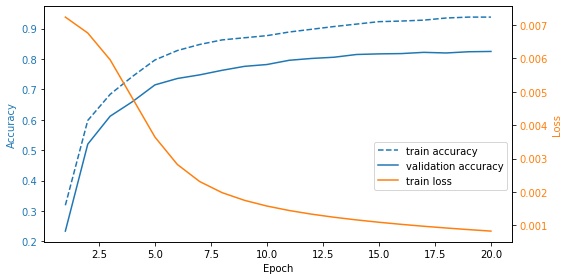

In [4]:
fig, ax1 = plt.subplots(figsize=(8,4))
ax1.plot(range(1,epochs+1),tr_acc_ep, '--',c='tab:blue',label='train accuracy')
ax1.plot(range(1,epochs+1),te_acc_ep, '-',c='tab:blue',label='validation accuracy')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xlabel('Epoch')
ax2 = ax1.twinx()
ax2.plot(range(1,epochs+1),loss_ep,'-',c='tab:orange', label='train loss')
ax2.set_ylabel('Loss',color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='lower right', bbox_to_anchor=(1,0.2))
fig.tight_layout()
plt.show()